In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
ls

 dataset.csv   drive/  'Fields Explanation.xlsx'   sample_data/


In [1]:
# Importing essential modules to alleviate the task

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading excel file which contains information of important columns as per advised by NorthPark Innovation.

get_col = pd.read_excel("Fields Explanation.xlsx",header =None)

In [3]:
get_col.head()

,0,1,2,3
0,Equipment - NominalTonnage,User Input/Equipment Information,Y,Y
1,Equipment - Manufacturer,User Input/Equipment Information,N,NaN
2,Equipment - CompressorType,User Input/Equipment Information,Y,Y
3,Equipment - CondenserPhase,User Input/Equipment Information,Y,Y
4,Equipment - NumberofRefrigerantCircuits,User Input/Equipment Information,Y,Y


In [4]:
# Collecting important columns from given dataset which are marked as 'Y'

cols = get_col[get_col[2] == 'Y'][list(get_col.columns)[:-1]]

In [5]:
cols.shape

(96, 3)

In [6]:
cols.head()

,0,1,2
0,Equipment - NominalTonnage,User Input/Equipment Information,Y
2,Equipment - CompressorType,User Input/Equipment Information,Y
3,Equipment - CondenserPhase,User Input/Equipment Information,Y
4,Equipment - NumberofRefrigerantCircuits,User Input/Equipment Information,Y
5,Equipment - Split or Packaged,User Input/Equipment Information,Y


In [7]:
# Reading main dataset

ds = pd.read_csv("dataset.csv", engine= 'python')

In [8]:
ds.shape

(18707, 154)

In [9]:
ds.head()

,Equipment - NominalTonnage,Equipment - Manufacturer,Equipment - CompressorType,Equipment - CondenserPhase,Equipment - NumberofRefrigerantCircuits,Equipment - Split or Packaged,Equipment - RefrigerantType,Equipment - CondenserModelNumber,Equipment - MeteringDevice,Equipment - AC or Heat Pump,...,TO_CapacityToNominal,TI_UnadjustedEER,TO_UnadjustedEER,TI_EERCorrectedToARIConditions,TO_EERCorrectedToARIConditions,EERpre,EERpost,DeemedEfficiencyLoss,TO_iManifoldWarning,EfficiencyLossEstimate
0,2.0,"RHEEM SALES COMPANY, INC.",Scroll,Single phase,1.0,Split,R410A,13AJN24A01,TXV,AC,...,108.38%,9.28,10.50,11.05,12.17,11.47,12.17,0.0572,Non-typical problem: Possible multiple problem...,9.20%
1,2.0,"GOODMAN MANUFACTURING CO., LP.",Scroll,Single phase,1.0,Split,R22,GSC130241AA,TXV,AC,...,105.35%,8.13,10.41,9.52,11.68,10.09,11.68,0.1360,Inadequate Compressor Cooling,18.49%
2,2.0,"GOODMAN MANUFACTURING CO., LP.",Scroll,Single phase,1.0,Split,R22,GSC130241AA,TXV,AC,...,110.26%,7.43,10.93,8.76,12.18,10.52,12.18,0.1360,Inadequate Compressor Cooling,28.08%
3,2.5,HAIER AMERICA,Scroll,Single phase,1.0,Split,R22,H30C1VAR,TXV,AC,...,106.94%,9.04,12.58,9.63,13.94,12.04,13.94,0.1360,Inadequate Compressor Cooling,30.92%
4,2.0,"RHEEM SALES COMPANY, INC.",Scroll,Single phase,1.0,Split,R410A,13AJN24A01,TXV,AC,...,111.19%,8.07,10.75,9.98,12.51,10.81,12.51,0.1360,Non-typical problem: Possible multiple problem...,20.22%


# Preprocessing

In [10]:
# When (AirflowMethodID == 2) then consider features "TI_TESP" and "TO_TESP".

ds["TI_TESP"] = np.where(ds["AirFlowMethodID"] == (3 | 1), ds['TI_TESP'] * 0, ds['TI_TESP'] * 1)
ds["TO_TESP"] = np.where(ds["AirFlowMethodID"] == (3 | 1), ds["TO_TESP"] * 0, ds["TO_TESP"] * 1)

In [11]:
# It converts categorical value to numerical value as per their degree.

def mapSpeedSetting(e):
    if e == 'Hi':
        return 5
    elif e == 'Med-Hi':
        return 4
    elif e == 'Med':
        return 3
    elif e == 'Med-Lo':
        return 2
    elif e == 'Lo':
        return 1

In [12]:
ds["TI_SpeedSetting"] = ds["TI_SpeedSetting"].apply(mapSpeedSetting)
ds["TO_SpeedSetting"] = ds["TO_SpeedSetting"].apply(mapSpeedSetting)

# When ("Equipment - BlowerMotorType" == "PSC") then consider features "TI_SpeedSetting" and "TO_SpeedSetting".

ds["TI_SpeedSetting"] = np.where(ds["Equipment - BlowerMotorType"] == "PSC", ds["TI_SpeedSetting"] * 1, ds["TI_SpeedSetting"] * 0)
ds["TO_SpeedSetting"] = np.where(ds["Equipment - BlowerMotorType"] == "PSC", ds["TO_SpeedSetting"] * 1, ds["TO_SpeedSetting"] * 0)

In [13]:
# When (AirflowMethodID === 2) then consider features "TO_ReturnAirStaticPressure" and "TO_SupplyAirStaticPressure".

ds["TO_ReturnAirStaticPressure"] = np.where(ds["AirFlowMethodID"] == (3 | 1), ds['TO_ReturnAirStaticPressure'] * 0, ds['TO_ReturnAirStaticPressure'] * 1)
ds["TO_SupplyAirStaticPressure"] = np.where(ds["AirFlowMethodID"] == (3 | 1), ds["TO_SupplyAirStaticPressure"] * 0, ds["TO_SupplyAirStaticPressure"] * 1)

In [14]:
# When (AirflowMethodID === 2) then consider features "TI_iM_StaticPressureCFM" and "TO_iM_StaticPressureCFM".

ds["TI_iM_StaticPressureCFM"] = np.where(ds["AirFlowMethodID"] == (3 | 1), ds['TI_iM_StaticPressureCFM'] * 0, ds['TI_iM_StaticPressureCFM'] * 1)
ds["TO_iM_StaticPressureCFM"] = np.where(ds["AirFlowMethodID"] == (3 | 1), ds["TO_iM_StaticPressureCFM"] * 0, ds["TO_iM_StaticPressureCFM"] * 1)

In [15]:
# Below dataframe object contains only important columns

dt = ds[cols[0]]

In [16]:
dt.shape

(18707, 96)

In [17]:
dt.head()

,Equipment - NominalTonnage,Equipment - CompressorType,Equipment - CondenserPhase,Equipment - NumberofRefrigerantCircuits,Equipment - Split or Packaged,Equipment - RefrigerantType,Equipment - MeteringDevice,Equipment - AC or Heat Pump,Equipment - BlowerMotorType,Equipment - LineSetLength,...,TO_CapacityToNominal,TI_UnadjustedEER,TO_UnadjustedEER,TI_EERCorrectedToARIConditions,TO_EERCorrectedToARIConditions,EERpre,EERpost,DeemedEfficiencyLoss,TO_iManifoldWarning,EfficiencyLossEstimate
0,2.0,Scroll,Single phase,1.0,Split,R410A,TXV,AC,PSC,34.0,...,108.38%,9.28,10.50,11.05,12.17,11.47,12.17,0.0572,Non-typical problem: Possible multiple problem...,9.20%
1,2.0,Scroll,Single phase,1.0,Split,R22,TXV,AC,PSC,34.0,...,105.35%,8.13,10.41,9.52,11.68,10.09,11.68,0.1360,Inadequate Compressor Cooling,18.49%
2,2.0,Scroll,Single phase,1.0,Split,R22,TXV,AC,PSC,34.0,...,110.26%,7.43,10.93,8.76,12.18,10.52,12.18,0.1360,Inadequate Compressor Cooling,28.08%
3,2.5,Scroll,Single phase,1.0,Split,R22,TXV,AC,PSC,36.0,...,106.94%,9.04,12.58,9.63,13.94,12.04,13.94,0.1360,Inadequate Compressor Cooling,30.92%
4,2.0,Scroll,Single phase,1.0,Split,R410A,TXV,AC,PSC,34.0,...,111.19%,8.07,10.75,9.98,12.51,10.81,12.51,0.1360,Non-typical problem: Possible multiple problem...,20.22%


In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Removing those attributes who have more than 5% missing values.

dt.dropna(thresh= len(dt) * 0.95, axis=1, inplace= True)

In [20]:
dt.shape

(18707, 67)

In [21]:
# Below attributes contain comma and % in the values. So these columns have to be cleaned.

col_list = ['TI_SensibleCapacity','TO_SensibleCapacity','TI_LatentCapacity','TO_LatentCapacity','TI_TotalUnadjustedCapacity',
 'TO_TotalUnadjustedCapacity','TI_TotalCapacityCorrectedToARIConditions','TO_TotalCapacityCorrectedToARIConditions',
 'TI_CapacityToNominal','TO_CapacityToNominal', "TI_CalculatedCFM", "TO_CalculatedCFM", 'iManifold - TO CFM', 
 "TI_EERCorrectedToARIConditions"]

In [22]:
# dt.to_excel("newDataset.xlsx")

In [23]:
# Removing comma and percentage from col_list which are in "dt" dataframe object.

for i in col_list:
    try:
        dt[i] = dt[i].str.replace(',', '').astype('float')
    except ValueError:
        dt[i] = dt[i].str.replace('%', '').astype('float')

In [24]:
# It gives informative things about dataset
# 1.) how many columns are categorical and numerical variable?
# 2.) How many values are missing in each attribute?

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18707 entries, 0 to 18706
Data columns (total 67 columns):
Equipment - NominalTonnage                  18706 non-null float64
Equipment - CompressorType                  18706 non-null object
Equipment - CondenserPhase                  18706 non-null object
Equipment - NumberofRefrigerantCircuits     18706 non-null float64
Equipment - Split or Packaged               18706 non-null object
Equipment - RefrigerantType                 18706 non-null object
Equipment - MeteringDevice                  18706 non-null object
Equipment - AC or Heat Pump                 18706 non-null object
Equipment - BlowerMotorType                 18694 non-null object
TRM_Building                                18660 non-null object
CondenserConditionPre                       18704 non-null object
EvaporatorConditionPre                      18704 non-null object
BlowerConditionPre                          18700 non-null object
FilterConditionPre             

In [25]:
# Removing those instances which have no label.

df = dt[dt["TO_iManifoldWarning"].notnull()]

In [26]:
df.shape

(18522, 67)

In [27]:
# Collecting unique label

y = {}
for i,j in enumerate(df["TO_iManifoldWarning"].unique()):
    y[j] = i

In [28]:
# Mapping warnings to numeric value

df["TO_iManifoldWarning"] = df["TO_iManifoldWarning"].map(y)

In [29]:
# Deleting feature "TRM_Building" from our dataframe object df.

del df["TRM_Building"]

In [30]:
# Object type or Categorical columns

cat_cols = list(set(df.columns) - set(df._get_numeric_data().columns) -set(["TO_iManifoldWarning"]))
cat_cols.sort()
cat_cols

['BlowerCleaned',
 'BlowerConditionPre',
 'CondenserCleaned',
 'CondenserConditionPre',
 'Equipment - AC or Heat Pump',
 'Equipment - BlowerMotorType',
 'Equipment - CompressorType',
 'Equipment - CondenserPhase',
 'Equipment - MeteringDevice',
 'Equipment - RefrigerantType',
 'Equipment - Split or Packaged',
 'EvaporatorCleaned',
 'EvaporatorConditionPre',
 'FilterCleanedOrReplaced',
 'FilterConditionPre',
 'RecommendReplaceUnit']

In [31]:
# Numerical columns

num_cols = list(df._get_numeric_data().columns)

In [32]:
# Missing values in categorical columns

df[cat_cols].isnull().sum()

BlowerCleaned                     0
BlowerConditionPre                6
CondenserCleaned                  0
CondenserConditionPre             2
Equipment - AC or Heat Pump       0
Equipment - BlowerMotorType      12
Equipment - CompressorType        0
Equipment - CondenserPhase        0
Equipment - MeteringDevice        0
Equipment - RefrigerantType       0
Equipment - Split or Packaged     0
EvaporatorCleaned                 0
EvaporatorConditionPre            2
FilterCleanedOrReplaced          13
FilterConditionPre                1
RecommendReplaceUnit              0
dtype: int64

In [33]:
# Missing values in Numerical columns

df[num_cols].isnull().sum()

Equipment - NominalTonnage                   0
Equipment - NumberofRefrigerantCircuits      0
AirFlowMethodID                              0
TI_TESP                                      0
TO_TESP                                      0
TI_CalculatedCFM                             8
TO_CalculatedCFM                             2
TI_CalculatedCFMPerTon                       8
TO_CalculatedCFMPerTon                       2
iManifold - TO CFM                           3
TO_SuctionPressure                           0
TO_DischargePressure                         0
TO_EvaporatorTemperature                     0
TO_CondenserTemperature                      0
TO_Superheat                                 0
iManifold - Target superheat                84
TO_Subcooling                                1
TO_SubcoolingTarget                          0
iManifold - Target subcooling                0
TO_VaporLineTemperature                      0
TO_LiquidLineTemperature                     0
TO_OutdoorAir

In [34]:
# Filling all missing values with mean in numerical columns and mode with in categorical columns.

for i in range(len(cat_cols)):
    df[cat_cols[i]].fillna(value = df[cat_cols[i]].mode()[0],inplace =True)
    
for i in range(len(num_cols)):
    df[num_cols[i]].fillna(value = df[num_cols[i]].mean(),inplace =True)

In [35]:
# Output of below command confirms that we have now gotten rid of missing values.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18522 entries, 0 to 18706
Data columns (total 66 columns):
Equipment - NominalTonnage                  18522 non-null float64
Equipment - CompressorType                  18522 non-null object
Equipment - CondenserPhase                  18522 non-null object
Equipment - NumberofRefrigerantCircuits     18522 non-null float64
Equipment - Split or Packaged               18522 non-null object
Equipment - RefrigerantType                 18522 non-null object
Equipment - MeteringDevice                  18522 non-null object
Equipment - AC or Heat Pump                 18522 non-null object
Equipment - BlowerMotorType                 18522 non-null object
CondenserConditionPre                       18522 non-null object
EvaporatorConditionPre                      18522 non-null object
BlowerConditionPre                          18522 non-null object
FilterConditionPre                          18522 non-null object
CondenserCleaned               

In [36]:
# Converting all categorical columns to one hot encoder vector.

x_cat = pd.get_dummies(df[cat_cols])

In [37]:
# Concatenating both dataframe objects containing categorical and numerical columns along column wise.

x = pd.concat([x_cat, df[num_cols]], axis=1)

In [38]:
x.shape

(18522, 110)

In [39]:
# Counts of each class in dataset x

x['TO_iManifoldWarning'].value_counts()

0     7267
6     2486
1     2291
11    1510
12     867
3      815
13     616
2      612
14     593
4      385
9      320
5      202
7      198
17     148
15      63
8       62
10      39
19      16
16      16
18       8
20       7
21       1
Name: TO_iManifoldWarning, dtype: int64

In [40]:
matplotlib.rcParams['xtick.labelsize'] = 24
matplotlib.rcParams['ytick.labelsize'] = 24
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams["axes.titlesize"]  = 24

Text(0.5, 1.0, 'Classes and its count in the whole dataset')

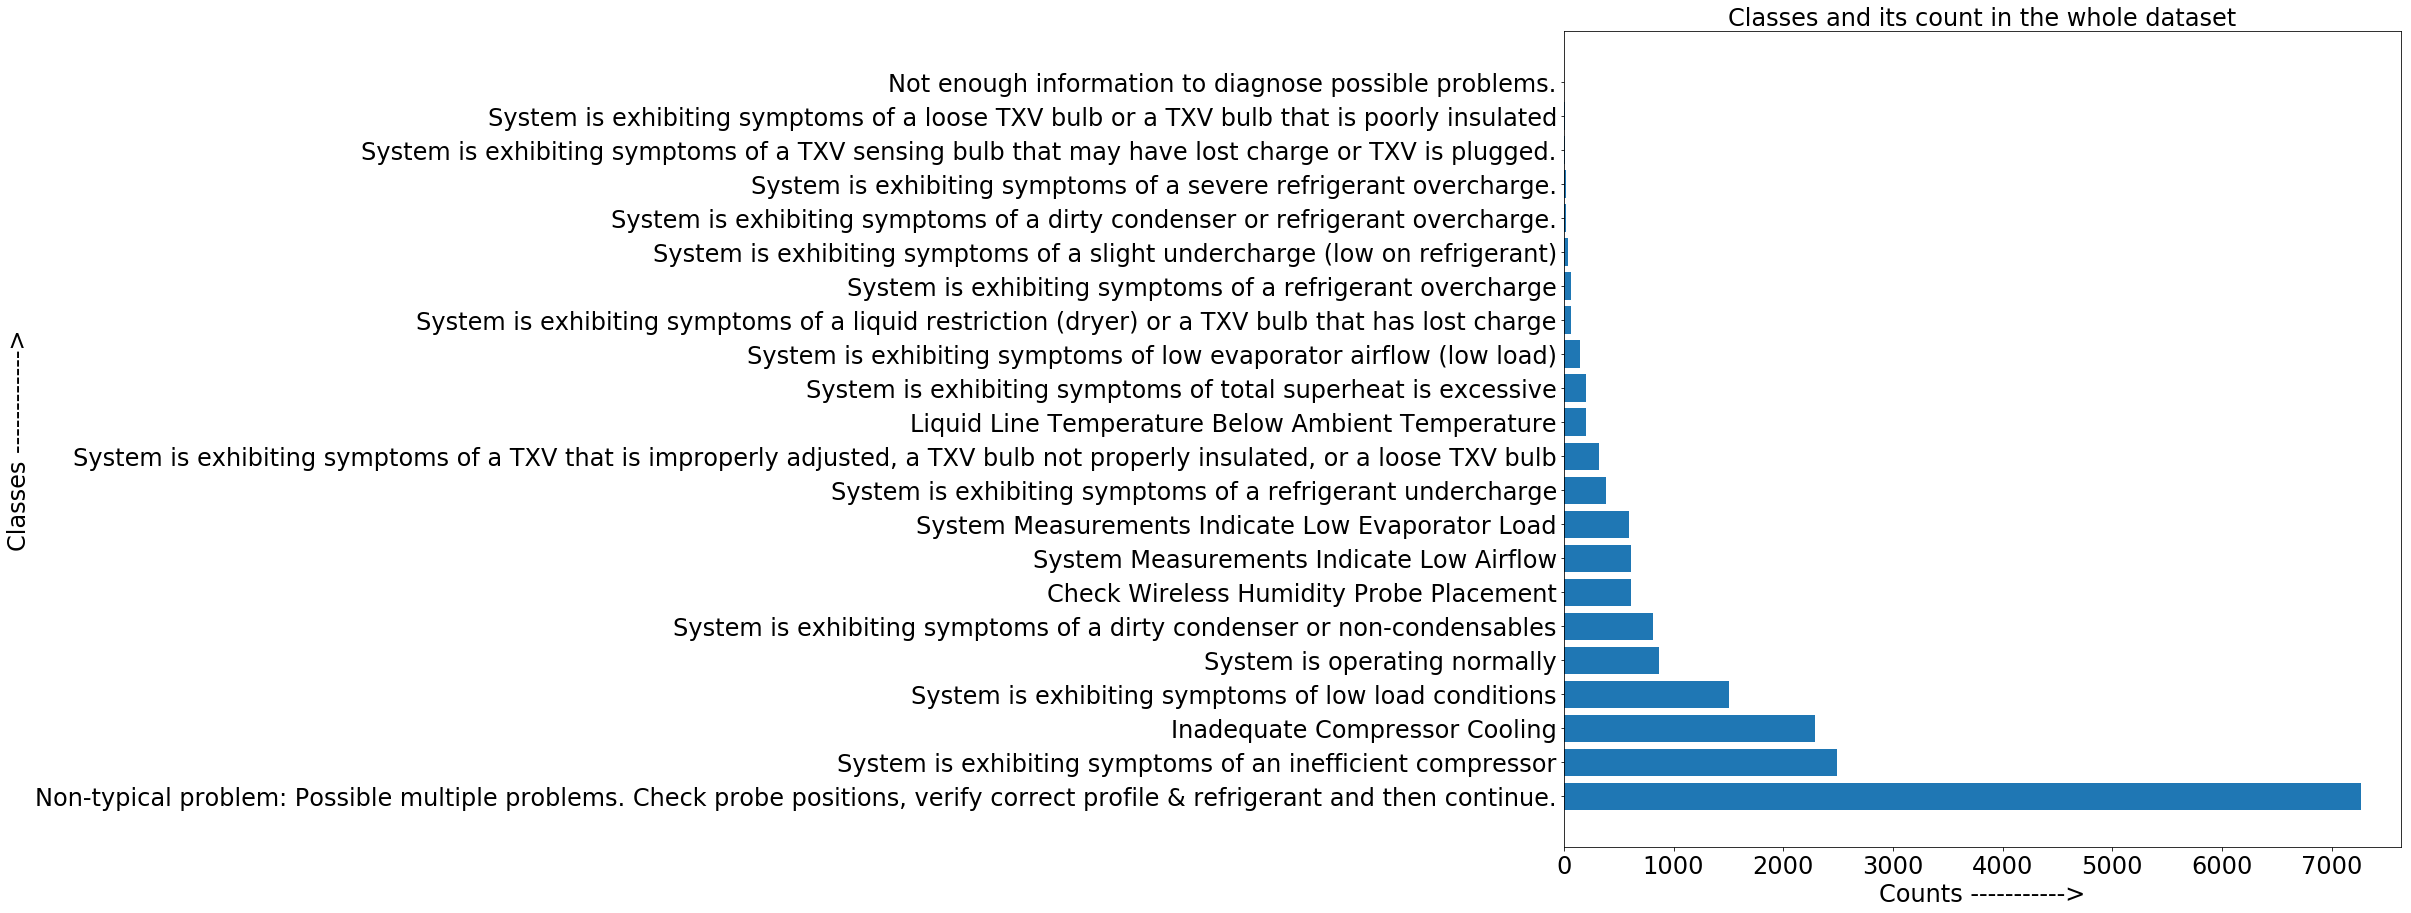

In [41]:
# Count of each class in the whole dataset.

plt.figure(figsize=(15,15))
plt.barh(list(dict(dt['TO_iManifoldWarning'].value_counts()).keys()),list(dict(dt['TO_iManifoldWarning'].value_counts()).values()))
plt.xlabel("Counts ----------->")
plt.ylabel("Classes ------------>")
plt.title("Classes and its count in the whole dataset")

In [42]:
# From above barplot we can say that distribution of classes are skewed.

In [43]:
# Let's see how classifiers perform?

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
# It gets all attributes to have the same scale.
# It standardizes features by removing the mean and scaling to unit variance.

sc = StandardScaler()

In [46]:
def SamplingMethod(name, x_):
    
    
    # Preparing X_train, X_test, y_train, y_test.
    # Test set has 25 % of the whole dataset.
    
    if name == 'random_sampling':
        
        # Random sampling
        
        X_train, X_test, y_train, y_test = train_test_split(x_.drop(['TO_iManifoldWarning'],axis=1), x_['TO_iManifoldWarning'] ,test_size =0.20,random_state=42)
        
    elif name == 'stratified_sampling':
        
        # Stratified sampling

        split = StratifiedShuffleSplit(n_splits=1,test_size=0.20,random_state=42)

        # Removing one label which is mapped to numeric value 21, because it has only one count in the whole dataset and thereby
        # stratified sampling does not apply on it. Because stratified sampling needs atleast 2 counts to be applied.

        x_ = x_[x_['TO_iManifoldWarning']!=21].reset_index(drop=True)
        y_ = x_['TO_iManifoldWarning']
        x_ = x_.drop(['TO_iManifoldWarning'],axis=1)
        for train_index, test_index in split.split(x_, y_):
            X_train = x_.loc[train_index].reset_index(drop=True)
            X_test = x_.loc[test_index].reset_index(drop=True)
            y_train = y_.loc[train_index].reset_index(drop=True)
            y_test = y_.loc[test_index].reset_index(drop=True)
            
    return X_train, X_test, y_train, y_test

In [47]:
# Initiating random sampling

X_train, X_test, y_train, y_test = SamplingMethod('random_sampling', x)
print("Random sampling\n")
print("The shape of X_train is ",X_train.shape)
print("The shape of X_test is ",X_test.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of y_test is ",y_test.shape)

print()
# Initiating stratified sampling

X_train_str, X_test_str, y_train_str, y_test_str = SamplingMethod('stratified_sampling', x)
print("Stratified sampling \n")
print("The shape of X_train_str is ",X_train_str.shape)
print("The shape of X_test_str is ",X_test_str.shape)
print("The shape of y_train_str is ",y_train_str.shape)
print("The shape of y_test_str is ",y_test_str.shape)

Random sampling

The shape of X_train is  (14817, 109)
The shape of X_test is  (3705, 109)
The shape of y_train is  (14817,)
The shape of y_test is  (3705,)

Stratified sampling 

The shape of X_train_str is  (14816, 109)
The shape of X_test_str is  (3705, 109)
The shape of y_train_str is  (14816,)
The shape of y_test_str is  (3705,)


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

In [49]:
def model(instance, X_train, y_train, X_test, y_test, name = "Test"):
    
    # Applying Standardization

    X_tr = sc.fit_transform(X_train)
    X_tes = sc.transform(X_test)
    clf = instance
    clf.fit(X_tr,y_train)

    print("Training accuracy : ",accuracy_score(y_train, clf.predict(X_tr)))
    y_pre = clf.predict(X_tes)
    print(name+" accuracy : ",accuracy_score(y_test, y_pre))
    
    return clf, y_test , y_pre

In [50]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [50]:
print("Accuracy of the dataset on which random sampling applied.")
lr, y_true_lr, y_pred_lr = model(LogisticRegression(), X_train, y_train, X_test, y_test)

print("\nAccuracy of the dataset on which stratified sampling applied.")
lr, y_true_str_lr, y_pred_str_lr = model(LogisticRegression(), X_train_str, y_train_str, X_test_str, y_test_str)

Accuracy of the dataset on which random sampling applied.
Training accuracy :  0.6400080988054262
Test accuracy :  0.6348178137651822

Accuracy of the dataset on which stratified sampling applied.
Training accuracy :  0.6424811015118791
Test accuracy :  0.6286099865047233


In [54]:
print("Accuracy of the dataset on which random sampling applied.")
sgd, y_true_sgd, y_pred_sgd = model(SGDClassifier(), X_train, y_train, X_test, y_test)

print("\nAccuracy of the dataset on which stratified sampling applied.")
sgd, y_true_str_sgd, y_pred_str_sgd = model(SGDClassifier(), X_train_str, y_train_str, X_test_str, y_test_str)

Accuracy of the dataset on which random sampling applied.
Training accuracy :  0.5918202065195384
Test accuracy :  0.5824561403508772

Accuracy of the dataset on which stratified sampling applied.
Training accuracy :  0.6010394168466523
Test accuracy :  0.5851551956815114


In [51]:
from sklearn.svm import SVC

In [55]:
print("Accuracy of the dataset on which random sampling applied.")
svc, y_true_svc, y_pred_svc = model(SVC(kernel='linear', gamma = 'scale'), X_train, y_train, X_test, y_test)

print("\nAccuracy of the dataset on which stratified sampling applied.")
svc, y_true_str_svc, y_pred_str_svc = model(SVC(kernel='linear', gamma = 'scale'), X_train_str, y_train_str, X_test_str, y_test_str)

Accuracy of the dataset on which random sampling applied.
Training accuracy :  0.7014240399541067
Test accuracy :  0.6736842105263158

Accuracy of the dataset on which stratified sampling applied.
Training accuracy :  0.7118655507559395
Test accuracy :  0.6758434547908232


In [0]:
# From above three results, we can say dataset on which stratified sampling is applied gives more better result than dataset on 
# which random sampling applied. So from now onwards, we will perform on dataset on which stratified sampling is applied. The 
# advantage of stratified sampling is that it splits the whole dataset into homogeneous subgroups called strata,and the right 
# number of instances is sampled from each stratum to gurantee that the test set is the representative of the whole dataset.

# Feature Importance

In [52]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [53]:
classifier = ExtraTreesClassifier()
classifier.fit(X_train_str,y_train_str)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

<BarContainer object of 51 artists>

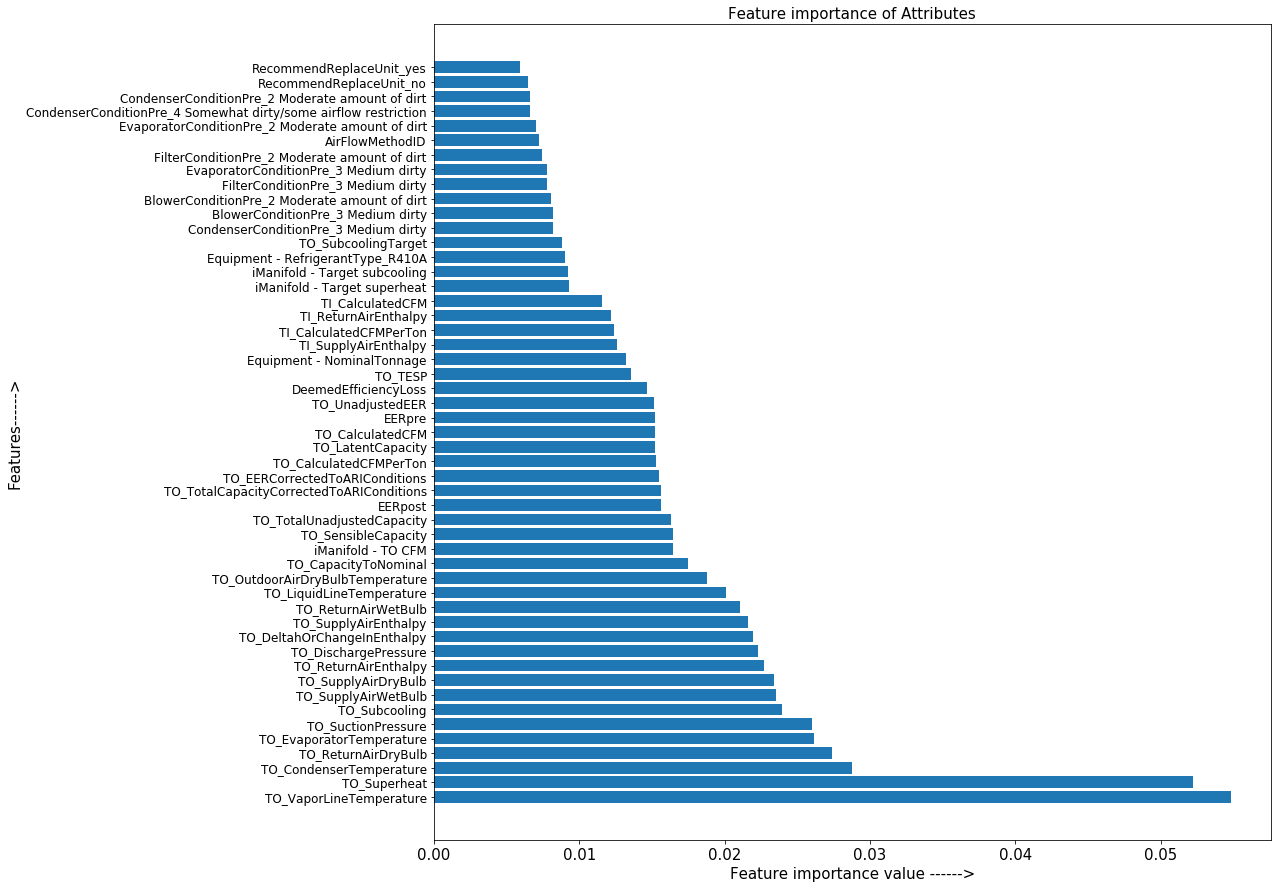

In [54]:
# plot graph of feature importances for better visualization.

matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams["axes.titlesize"]  = 15

feat_importances = pd.Series(classifier.feature_importances_, index=X_train_str.columns)
fi = pd.DataFrame(feat_importances.nlargest(95))
fi_ = pd.DataFrame(feat_importances.nlargest(51))
plt.figure(figsize=(15,15))
plt.ylabel("Features------>")
plt.xlabel("Feature importance value ------>")
plt.title("Feature importance of Attributes")
plt.barh(fi_.index,fi_[0],orientation = 'horizontal')

In [55]:
# Removing those columns whose significance is zero.

In [56]:
attr_list = list(fi.index)

X_train_str, X_test_str, y_train_str, y_test_str = X_train_str[attr_list], X_test_str[attr_list], y_train_str, y_test_str

print("The shape of X_train_str is ",X_train_str.shape)
print("The shape of X_test_str is ",X_test_str.shape)
print("The shape of y_train_str is ",y_train_str.shape)
print("The shape of y_test_str is ",y_test_str.shape)

The shape of X_train_str is  (14816, 95)
The shape of X_test_str is  (3705, 95)
The shape of y_train_str is  (14816,)
The shape of y_test_str is  (3705,)


In [57]:
# Splitting Training set into Training and Validation set

split_1 = StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=42)

for train_index, val_index in split_1.split(X_train_str, y_train_str):
    X_train_nw_str = X_train_str.loc[train_index].reset_index(drop=True)
    X_val_nw_str = X_train_str.loc[val_index].reset_index(drop=True)
    y_train_nw_str = y_train_str.loc[train_index].reset_index(drop=True)
    y_val_nw_str = y_train_str.loc[val_index].reset_index(drop=True)

In [58]:
X_train_str, X_val_str, y_train_str, y_val_str = X_train_nw_str, X_val_nw_str, y_train_nw_str, y_val_nw_str

print("The shape of X_train_str is ",X_train_str.shape)
print("The shape of X_val_str is ",X_val_str.shape)
print("The shape of X_test_str is ",X_test_str.shape)
print("The shape of y_train_str is ",y_train_str.shape)
print("The shape of y_val_str is ",y_val_str.shape)
print("The shape of y_test_str is ",y_test_str.shape)

The shape of X_train_str is  (11112, 95)
The shape of X_val_str is  (3704, 95)
The shape of X_test_str is  (3705, 95)
The shape of y_train_str is  (11112,)
The shape of y_val_str is  (3704,)
The shape of y_test_str is  (3705,)


In [62]:
# Feeding the classifier on X_train_str and evaluate on X_val_str

lr, y_true_str_lr, y_pred_str_lr = model(LogisticRegression(), X_train_str, y_train_str, X_val_str, y_val_str, name = "Validation")

Training accuracy :  0.6443484521238301
Validation accuracy :  0.6228401727861771


In [65]:
# Confusion matrix for LogisticRegression() classifier

print(confusion_matrix(y_true_str_lr, y_pred_str_lr))

[[1245   28    2   30    6    0   93    0    0    6    0   27    0    5
     9    0    0    2    0    0    0]
 [  21  424    0    1    1    0    9    0    1    0    0    0    0    1
     0    0    0    0    0    0    0]
 [  40    9   25    8    2    0    8    0    0    2    0    1    0   25
     1    0    0    1    0    0    0]
 [  73    3    0   86    0    0    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [  40    2    0    0   23    0    8    0    0    0    0    1    0    2
     1    0    0    0    0    0    0]
 [  25    9    2    0    0    2    0    0    0    0    0    0    0    1
     2    0    0    0    0    0    0]
 [ 186    2    1    0    1    0  304    0    0    0    0    1    0    2
     0    0    0    0    0    0    0]
 [  38    0    0    1    0    0    0    0    0    0    0    0    0    1
     0    0    0    0    0    0    0]
 [  11    0    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [  14    

In [66]:
# Classification report for LogisticRegression() classifier

print(classification_report(y_true_str_lr, y_pred_str_lr))

              precision    recall  f1-score   support

           0       0.56      0.86      0.68      1453
           1       0.87      0.93      0.90       458
           2       0.56      0.20      0.30       122
           3       0.64      0.53      0.58       163
           4       0.59      0.30      0.40        77
           5       1.00      0.05      0.09        41
           6       0.63      0.61      0.62       497
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        12
           9       0.76      0.41      0.53        64
          10       0.00      0.00      0.00         8
          11       0.55      0.14      0.22       302
          12       0.00      0.00      0.00       173
          13       0.49      0.32      0.38       123
          14       0.88      0.79      0.83       119
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00         3
          17       0.00    

In [0]:
# We can see from confusion matrix and classification report that Logistic classifier did not perform well. For many classes
# it could not predict and thereby we got precision and recall equal to zero.

In [68]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [59]:
from sklearn.model_selection import GridSearchCV

def gridSearch(algorithm, param_grid, X_train, X_test, y_train, y_test):
    
    grid_search = GridSearchCV(algorithm, param_grid, scoring= 'accuracy', n_jobs = -1)
    X_tr = sc.fit_transform(X_train)
    X_tes = sc.transform(X_test)
    grid_search.fit(X_train, y_train)
  
    print("Best parameters : ",grid_search.best_params_)
    print("\nBest Estimator : ",grid_search.best_estimator_)

In [70]:
params = {'penalty':['l2', 'l1'] , 'C':[1, 10, 100]}
gridSearch(LogisticRegression(), params, X_train_str, X_val_str, y_train_str, y_val_str)

Best parameters :  {'C': 10, 'penalty': 'l1'}

Best Estimator :  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [59]:
# Passing best parameters searched by grid search to LogisticRegression()  classifier.

lr_tuned, y_true_str_lr, y_pred_str_lr = model(LogisticRegression(C=10,penalty='l1'), X_train_str, y_train_str, X_val_str, y_val_str, name = "Validation")

Training accuracy :  0.6574874010079194
Validation accuracy :  0.6314794816414687


In [60]:
print("Test accuracy for Logistic regression tuned classifier:", lr_tuned.score(sc.transform(X_test_str), y_test_str))

Test accuracy for Logistic regression tuned classifier: 0.6304993252361674


In [61]:
# Classification report for LogisticRegression() classifier

print(classification_report(y_true_str_lr, y_pred_str_lr))

              precision    recall  f1-score   support

           0       0.57      0.85      0.68      1453
           1       0.88      0.91      0.89       458
           2       0.55      0.22      0.32       122
           3       0.66      0.57      0.61       163
           4       0.66      0.35      0.46        77
           5       0.50      0.05      0.09        41
           6       0.65      0.61      0.63       497
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        12
           9       0.85      0.62      0.72        64
          10       0.00      0.00      0.00         8
          11       0.53      0.15      0.24       302
          12       0.00      0.00      0.00       173
          13       0.50      0.35      0.41       123
          14       0.90      0.91      0.90       119
          15       0.00      0.00      0.00        13
          16       0.12      0.33      0.18         3
          17       0.25    

In [71]:
# Feeding the classifier on X_train_str and evaluate on X_val_str

sgd, y_true_str_sgd, y_pred_str_sgd = model(SGDClassifier(), X_train_str, y_train_str, X_val_str, y_val_str, name = "Validation")

Training accuracy :  0.5948524118070554
Validation accuracy :  0.5656047516198704


In [72]:
# Confusion matrix for SGDClassifier() classifier

print(confusion_matrix(y_true_str_sgd, y_pred_str_sgd))

[[1014   27    2   16    7    8  198    6    4    6    1   95   38   13
     9    1    1    7    0    0    0]
 [  38  403    2    0    1    0    6    0    1    0    1    3    1    0
     0    2    0    0    0    0    0]
 [  28   10   36    6    2    1    8    0    0    1    0    9    3   17
     1    0    0    0    0    0    0]
 [  81    2    0   70    0    1    5    1    0    0    0    0    1    2
     0    0    0    0    0    0    0]
 [  21    1    0    0   26    0    8    2    0    0    0   12    5    0
     1    0    0    1    0    0    0]
 [  21    9    2    0    0    3    1    0    0    0    0    2    0    1
     2    0    0    0    0    0    0]
 [ 116    2    2    0    3    4  333    0    0    0    0   23    6    6
     2    0    0    0    0    0    0]
 [  23    0    1    0    0    0    0    1    0    0    0    2   10    3
     0    0    0    0    0    0    0]
 [  10    0    0    1    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0]
 [  12    

In [73]:
# Classification report for SGDClassifier() classifier

print(classification_report(y_true_str_sgd, y_pred_str_sgd))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63      1453
           1       0.87      0.88      0.88       458
           2       0.42      0.30      0.35       122
           3       0.70      0.43      0.53       163
           4       0.58      0.34      0.43        77
           5       0.17      0.07      0.10        41
           6       0.52      0.67      0.58       497
           7       0.10      0.03      0.04        40
           8       0.17      0.08      0.11        12
           9       0.78      0.45      0.57        64
          10       0.00      0.00      0.00         8
          11       0.21      0.16      0.18       302
          12       0.05      0.02      0.03       173
          13       0.40      0.28      0.33       123
          14       0.85      0.77      0.81       119
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00         3
          17       0.15    

In [74]:
params = {'penalty':['l2', 'l1'] , 'alpha':[0.0001, 0.001]}
gridSearch(SGDClassifier(), params, X_train_str, X_val_str, y_train_str, y_val_str)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters :  {'alpha': 0.001, 'penalty': 'l2'}

Best Estimator :  SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [66]:
# Passing best parameters searched by grid search to SGDClassifier()  classifier.

sgd_tuned, y_true_str_sgd, y_pred_str_sgd = model(SGDClassifier(alpha=0.001), X_train_str, y_train_str, X_val_str, y_val_str, name = "Validation")

Training accuracy :  0.6028617710583153
Validation accuracy :  0.5842332613390929


In [67]:
print("Test accuracy for SGD tuned classifier :", sgd_tuned.score(sc.transform(X_test_str), y_test_str))

Test accuracy : 0.5802968960863698


In [75]:
# Feeding the classifier on X_train_str and evaluate on X_val_str
# 'RBF' kernel 

svc, y_true_str_svc, y_pred_str_svc = model(SVC(gamma = 'scale'), X_train_str, y_train_str, X_val_str, y_val_str, name = "Validation")

Training accuracy :  0.705093592512599
Validation accuracy :  0.6115010799136069


In [76]:
# Confusion matrix for SVC() classifier for rbf kernel

print(confusion_matrix(y_true_str_svc, y_pred_str_svc))

[[1278   17    2   29    0    0   91    0    0    0    0   20    0    5
    11    0    0    0    0    0    0]
 [  43  403    1    0    0    0   11    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [  54    8   24    5    0    0   11    0    0    0    0    0    0   20
     0    0    0    0    0    0    0]
 [  82    0    0   80    0    0    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [  59    0    0    1    6    0    5    0    0    0    0    3    0    1
     2    0    0    0    0    0    0]
 [  28    9    1    0    0    0    0    0    0    0    0    0    0    1
     2    0    0    0    0    0    0]
 [ 164    3    4    1    0    0  314    0    0    0    0    8    0    0
     3    0    0    0    0    0    0]
 [  39    0    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   7    0    0    5    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [  33    

In [77]:
# Classification report for SVC() classifier for rbf kernel

print(classification_report(y_true_str_svc, y_pred_str_svc))

              precision    recall  f1-score   support

           0       0.55      0.88      0.68      1453
           1       0.89      0.88      0.89       458
           2       0.53      0.20      0.29       122
           3       0.63      0.49      0.55       163
           4       1.00      0.08      0.14        77
           5       0.00      0.00      0.00        41
           6       0.63      0.63      0.63       497
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        12
           9       1.00      0.20      0.34        64
          10       0.00      0.00      0.00         8
          11       0.55      0.16      0.24       302
          12       0.00      0.00      0.00       173
          13       0.52      0.24      0.33       123
          14       0.76      0.59      0.66       119
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00         3
          17       0.00    

In [62]:
# Feeding the classifier on X_train_str and evaluate on X_val_str
# 'linear' kernel 

svc_l, y_true_str_svc, y_pred_str_svc = model(SVC(kernel='linear',gamma = 'scale'), X_train_str, y_train_str, X_val_str, y_val_str, name = "Validation")

Training accuracy :  0.7230921526277898
Validation accuracy :  0.6690064794816415


In [63]:
# Confusion matrix for SVC() classifier for linear kernel

print(confusion_matrix(y_true_str_svc, y_pred_str_svc))

[[1275    6    3   31    8    0   83    0    2    4    0   27    0    5
     5    1    3    0    0    0    0]
 [  13  437    0    0    1    0    3    0    1    0    0    0    0    1
     1    1    0    0    0    0    0]
 [  24    7   51    3    1    0    4    0    0    1    0    1    0   29
     0    0    0    1    0    0    0]
 [  58    2    0   99    0    0    1    0    1    0    0    0    0    0
     1    0    1    0    0    0    0]
 [  34    1    0    0   37    0    3    0    0    0    0    1    0    1
     0    0    0    0    0    0    0]
 [  26    9    2    0    0    1    0    0    0    0    0    0    0    1
     2    0    0    0    0    0    0]
 [ 158    0    0    0    2    0  325    0    0    0    0    6    0    3
     3    0    0    0    0    0    0]
 [  40    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   7    0    0    3    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    1]
 [  16    

In [64]:
# Classification report for SVC() classifier for linear kernel

print(classification_report(y_true_str_svc, y_pred_str_svc))

              precision    recall  f1-score   support

           0       0.60      0.88      0.71      1453
           1       0.93      0.95      0.94       458
           2       0.54      0.42      0.47       122
           3       0.70      0.61      0.65       163
           4       0.65      0.48      0.55        77
           5       0.50      0.02      0.05        41
           6       0.74      0.65      0.69       497
           7       0.00      0.00      0.00        40
           8       0.20      0.08      0.12        12
           9       0.89      0.64      0.75        64
          10       0.00      0.00      0.00         8
          11       0.62      0.22      0.32       302
          12       0.00      0.00      0.00       173
          13       0.53      0.40      0.45       123
          14       0.87      0.79      0.83       119
          15       0.33      0.08      0.12        13
          16       0.20      0.33      0.25         3
          17       0.00    

In [ ]:
params = {'kernel':['linear','rbf'] , 'C':[1,10]}
gridSearch(SVC(gamma = 'scale'), params, X_train_str, X_val_str, y_train_str, y_val_str)

In [0]:
# Passing best parameters searched by grid search to SVC() classifier.

svc_tuned, y_true_str_svc, y_pred_str_svc = model(SVC(gamma = 'scale'), X_train_str, y_train_str, X_val_str, y_val_str, name = "Validation")

In [0]:
print("Test accuracy for SVC tuned classifier :", svc_tuned.score(sc.transform(X_test_str), y_test_str))

In [70]:
# Feeding the classifier on X_train_str and evaluate on X_val_str

rf, y_true_str_rf, y_pred_str_rf = model(RandomForestClassifier(), X_train_str, y_train_str, X_val_str, y_val_str, name = "Validation")

Training accuracy :  0.9887508999280058
Validation accuracy :  0.6468682505399568


In [71]:
# Confusion matrix for RandomForestClassifier() classifier

print(confusion_matrix(y_true_str_rf, y_pred_str_rf))

[[1261    9    7   25    5    0   80    0    0    3    1   30   13   14
     3    0    0    2    0    0    0]
 [   5  450    1    0    0    0    1    0    0    0    0    0    0    1
     0    0    0    0    0    0    0]
 [  57   11   26    4    1    0   12    0    0    0    0    1    1    8
     1    0    0    0    0    0    0]
 [  69    0    0   83    0    0    9    0    0    0    0    1    1    0
     0    0    0    0    0    0    0]
 [  50    0    0    1   12    0    3    0    0    1    0    6    1    1
     2    0    0    0    0    0    0]
 [  23    9    1    0    0    1    0    0    0    0    0    2    0    3
     2    0    0    0    0    0    0]
 [ 160    2    1    1    1    0  309    0    0    3    0   17    2    1
     0    0    0    0    0    0    0]
 [  35    0    0    0    0    0    0    3    0    1    0    1    0    0
     0    0    0    0    0    0    0]
 [   7    0    0    4    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0]
 [  28    

In [72]:
# Classification report for RandomForestClassifier() classifier

print(classification_report(y_true_str_rf, y_pred_str_rf))

              precision    recall  f1-score   support

           0       0.61      0.87      0.71      1453
           1       0.92      0.98      0.95       458
           2       0.45      0.21      0.29       122
           3       0.66      0.51      0.57       163
           4       0.43      0.16      0.23        77
           5       1.00      0.02      0.05        41
           6       0.63      0.62      0.63       497
           7       0.75      0.07      0.14        40
           8       1.00      0.08      0.15        12
           9       0.60      0.19      0.29        64
          10       0.00      0.00      0.00         8
          11       0.46      0.26      0.34       302
          12       0.31      0.09      0.14       173
          13       0.49      0.26      0.34       123
          14       0.93      0.92      0.93       119
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00         3
          17       0.00    

In [66]:
params = {'n_estimators': [50,100,200, 500],'min_samples_leaf':[1,2,3,4],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,6,8,10,12],'criterion' :['gini', 'entropy']}
gridSearch(RandomForestClassifier(warm_start=True), params, X_train_str, X_val_str, y_train_str, y_val_str)

Best parameters :  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 500}

Best Estimator :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=True)


In [82]:
# Passing best parameters searched by grid search to RandomForest() classifier.

rf_tuned, y_true_str_rf, y_pred_str_rf = model(RandomForestClassifier(warm_start=True,criterion= 'entropy', max_depth= 12, max_features ='auto', n_estimators= 50,min_samples_leaf= 1), X_train_str, y_train_str, X_val_str, y_val_str, name = "Validation")

Training accuracy :  0.8917386609071274
Validation accuracy :  0.6722462203023758


In [84]:
params = {'n_estimators': [50,100,200, 500],'min_samples_leaf':[1,2,3,4],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,6,8,10,12],'criterion' :['gini', 'entropy']}
gridSearch(ExtraTreesClassifier(warm_start=True), params, X_train_str, X_val_str, y_train_str, y_val_str)

Best parameters :  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 50}

Best Estimator :  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=12, max_features='sqrt', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=True)


In [85]:
# Feeding the classifier on X_train_str and evaluate on X_val_str

extrf, y_true_str_extrf, y_pred_str_extrf = model(ExtraTreesClassifier(warm_start=True,criterion= 'gini', max_depth= 12, max_features ='sqrt', n_estimators= 50,min_samples_leaf= 2), X_train_str, y_train_str, X_val_str, y_val_str, name = "Validation")

Training accuracy :  0.6565874730021598
Validation accuracy :  0.5383369330453563


In [86]:
# Confusion matrix for ExtraTreesClassifier() classifier

print(confusion_matrix(y_true_str_extrf, y_pred_str_extrf))

[[1373   14    0   17    0    0   39    0    0    0    0    3    0    1
     6    0    0    0    0    0    0]
 [ 123  328    0    0    0    0    7    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [  87    7   14    4    0    0    9    0    0    0    0    0    0    1
     0    0    0    0    0    0    0]
 [  97    0    0   65    0    0    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [  64    4    0    1    6    0    2    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [  31    8    0    0    0    0    0    0    0    0    0    0    0    0
     2    0    0    0    0    0    0]
 [ 348    5    0    5    0    0  135    0    0    0    0    0    0    0
     4    0    0    0    0    0    0]
 [  40    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   9    1    0    2    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [  53    

In [87]:
# Classification report for ExtraTreesClassifier() classifier

print(classification_report(y_true_str_extrf, y_pred_str_extrf))

              precision    recall  f1-score   support

           0       0.48      0.94      0.64      1453
           1       0.87      0.72      0.79       458
           2       0.88      0.11      0.20       122
           3       0.64      0.40      0.49       163
           4       1.00      0.08      0.14        77
           5       0.00      0.00      0.00        41
           6       0.54      0.27      0.36       497
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        64
          10       0.00      0.00      0.00         8
          11       0.76      0.05      0.10       302
          12       0.00      0.00      0.00       173
          13       0.82      0.07      0.13       123
          14       0.74      0.40      0.52       119
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00         3
          17       0.00    

In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense, regularizers

Using TensorFlow backend.


In [61]:
def ANN(X, one_hot_train_y):
    
    # Initialising the ANN

    ann = Sequential()
    
    # Adding the input layer and the first hidden layer

    ann.add(Dense(units= 128, kernel_initializer='uniform',activation='relu',kernel_regularizer=regularizers.l2(0.001),
                    input_shape= (X.shape[1],)))

    # Adding the output layer

    ann.add(Dense(units=one_hot_train_y.shape[1], kernel_initializer='uniform',activation="softmax"))
    ann.compile(optimizer='sgd',loss= 'categorical_crossentropy',metrics=['accuracy'])
    history = ann.fit(sc.fit_transform(X),one_hot_train_y,
                      validation_split=0.15,batch_size= 64,epochs=150,verbose=False)
    return ann, history

In [133]:
#  Converting training , validation and test set in to one hot vector.

one_hot_train_y = keras.utils.to_categorical(np.concatenate([y_train_str,y_val_str]))
one_hot_test_y = keras.utils.to_categorical(y_test_str)

# Training ANN

ann, history = ANN(np.concatenate([X_train_str, X_val_str]), one_hot_train_y)

In [134]:
# Training accuracy

ann.evaluate(sc.transform(np.concatenate([X_train_str, X_val_str])), one_hot_train_y)[1]

14816/14816 [==============================] - 0s 23us/step


0.802713282937365

In [135]:
# Calculating loss and test accuracy

loss_test, accuracy_test = ann.evaluate(sc.transform(X_test_str), one_hot_test_y)

3705/3705 [==============================] - 0s 27us/step


In [136]:
print("Loss for test set of ANN :",loss_test)
print("Accuracy for test set of ANN is ",accuracy_test)

Loss for test set of ANN : 0.8674358842826565
Accuracy for test set of ANN is  0.7354925777908923


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

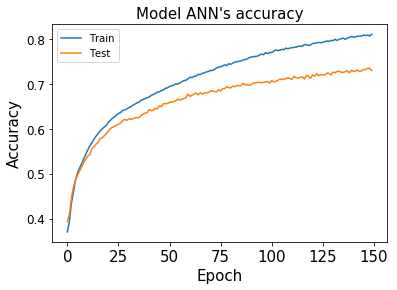

In [99]:
# Model accuracy for ANN

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model ANN's accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

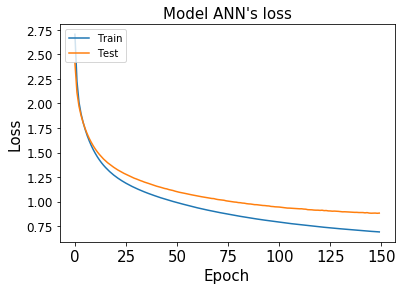

In [100]:
# Loss for ANN

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model ANN's loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [144]:
# Classification report for ANN classifier

print(classification_report(y_test_str, np.argmax(ann.predict(sc.transform(X_test_str)),axis=1)))

              precision    recall  f1-score   support

           0       0.88      0.49      0.63      1454
           1       0.82      0.88      0.85       458
           2       0.51      0.66      0.58       122
           3       0.57      0.83      0.68       163
           4       0.47      0.75      0.58        77
           5       0.13      0.23      0.17        40
           6       0.75      0.77      0.76       497
           7       0.31      0.82      0.45        40
           8       0.38      0.42      0.40        12
           9       0.54      0.94      0.68        64
          10       0.05      0.12      0.07         8
          11       0.61      0.71      0.66       302
          12       0.40      0.71      0.52       174
          13       0.53      0.56      0.55       123
          14       0.70      0.92      0.80       119
          15       0.15      0.54      0.23        13
          16       0.50      1.00      0.67         3
          17       0.35    

In [63]:
from xgboost import XGBClassifier

In [71]:
xgb_ = XGBClassifier(max_depth=3,learning_rate=0.1)
xgb, y_true_str_xgb, y_pred_str_xgb = model(xgb_, X_train_str, y_train_str, X_val_str, y_val_str, name = "Validation")

Training accuracy :  0.8054355651547876
Validation accuracy :  0.7397408207343412


In [72]:
print("Test accuracy for xgb classifier :", xgb.score(sc.transform(X_test_str), y_test_str))

Test accuracy for xgb classifier : 0.7392712550607288


In [73]:
# Classification report for XGBClassifier classifier

print(classification_report(y_test_str, xgb.predict(sc.transform(X_test_str))))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1454
           1       0.95      0.98      0.97       458
           2       0.60      0.30      0.40       122
           3       0.77      0.68      0.72       163
           4       0.85      0.51      0.63        77
           5       0.80      0.10      0.18        40
           6       0.74      0.86      0.80       497
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        12
           9       0.62      0.78      0.69        64
          10       0.00      0.00      0.00         8
          11       0.69      0.51      0.59       302
          12       0.00      0.00      0.00       174
          13       0.58      0.54      0.56       123
          14       0.95      0.98      0.97       119
          15       0.33      0.08      0.12        13
          16       0.00      0.00      0.00         3
          17       0.61    

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [75]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=151, algorithm='SAMME.R', learning_rate=0.003)
ada, y_true_str_ada, y_pred_str_ada = model(ada_clf, X_train_str, y_train_str, X_val_str, y_val_str, name = "Validation")

Training accuracy :  0.7099532037437005
Validation accuracy :  0.6730561555075594


In [76]:
print("Test accuracy for xgb classifier :", ada.score(sc.transform(X_test_str), y_test_str))

Test accuracy for xgb classifier : 0.6785425101214575


In [77]:
# Classification report for AdaBoostClassifier classifier

print(classification_report(y_test_str, ada.predict(sc.transform(X_test_str))))

              precision    recall  f1-score   support

           0       0.62      0.90      0.73      1454
           1       0.96      0.95      0.95       458
           2       0.32      0.09      0.14       122
           3       0.82      0.49      0.61       163
           4       0.67      0.05      0.10        77
           5       0.29      0.05      0.09        40
           6       0.72      0.77      0.74       497
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        12
           9       0.76      0.20      0.32        64
          10       0.00      0.00      0.00         8
          11       0.53      0.53      0.53       302
          12       0.00      0.00      0.00       174
          13       0.56      0.07      0.13       123
          14       0.95      0.92      0.94       119
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00         3
          17       0.00    

In [78]:
gbc_ = GradientBoostingClassifier(max_depth=2,n_estimators=151,learning_rate=0.15)
gbc, y_true_str_gbc, y_pred_str_gbc = model(gbc_, X_train_str, y_train_str, X_val_str, y_val_str, name = "Validation")

Training accuracy :  0.8201043916486681
Validation accuracy :  0.722732181425486


In [79]:
print("Test accuracy for xgb classifier :", gbc.score(sc.transform(X_test_str), y_test_str))

Test accuracy for xgb classifier : 0.7271255060728745


In [80]:
# Classification report for GradientBoostingClassifier classifier

print(classification_report(y_test_str, gbc.predict(sc.transform(X_test_str))))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77      1454
           1       0.96      0.97      0.96       458
           2       0.52      0.28      0.36       122
           3       0.74      0.74      0.74       163
           4       0.87      0.58      0.70        77
           5       0.37      0.25      0.30        40
           6       0.76      0.81      0.78       497
           7       0.67      0.05      0.09        40
           8       1.00      0.08      0.15        12
           9       0.60      0.70      0.65        64
          10       0.00      0.00      0.00         8
          11       0.67      0.47      0.55       302
          12       0.53      0.10      0.17       174
          13       0.55      0.53      0.54       123
          14       0.93      0.94      0.94       119
          15       0.14      0.08      0.10        13
          16       0.00      0.00      0.00         3
          17       0.62    

In [65]:
from sklearn.ensemble import VotingClassifier

In [100]:
# Ensemble learning

lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
rf = RandomForestClassifier(warm_start=True,criterion= 'entropy', max_depth= 12, max_features ='auto', n_estimators= 50)
extrf = ExtraTreesClassifier(warm_start=True,criterion= 'gini', max_depth= 12, max_features ='sqrt', n_estimators= 50,min_samples_leaf= 2)
sgd = SGDClassifier(alpha=0.001, penalty='l2')
svc_l = SVC(kernel='linear', C=10, gamma = 2)
svc_r = SVC(probability=True)
xgb = XGBClassifier(max_depth=3,learning_rate=0.1)
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=151, algorithm='SAMME.R', learning_rate=0.003)
gb = GradientBoostingClassifier(max_depth=2,n_estimators=151,learning_rate=0.15)


# Hard Voting

# hard_voting_clf = VotingClassifier(estimators=[('lr',lr), ('rf',rf), ('extrf',extrf),('sgd',sgd),('svc_l', svc_l), 
#                             ('svc_r', svc_r),('xgb',xgb),('ada',ada),('gb',gb)], voting = 'hard')
hard_voting_clf = VotingClassifier(estimators=[('lr',lr), ('extrf',extrf), ('xgb',xgb),('svc_l', svc_l),
                                               ('ada',ada),('gb',gb)], voting = 'hard')

hard_voting_clf.fit(sc.fit_transform(np.concatenate([X_train_str,X_val_str])), np.concatenate([y_train_str,y_val_str]))

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('extrf',
                              ExtraTreesClassifier(bootstrap=False,
                                                   class_weight=None,
                                                   criteri...
                                            

In [103]:
# Training accuracy for hard voting

accuracy_score(np.concatenate([y_train_str,y_val_str]),hard_voting_clf.predict(sc.transform(np.concatenate([X_train_str,X_val_str]))))

0.7504724622030238

In [104]:
# Test accuracy for hard voting

accuracy_score(y_test_str,hard_voting_clf.predict(sc.transform(X_test_str)))

0.7036437246963563

In [105]:
# Classification report for Hard voting classifier

print(classification_report(y_test_str, hard_voting_clf.predict(sc.transform(X_test_str))))

              precision    recall  f1-score   support

           0       0.61      0.94      0.74      1454
           1       0.94      0.99      0.96       458
           2       0.62      0.23      0.34       122
           3       0.80      0.63      0.71       163
           4       0.87      0.34      0.49        77
           5       1.00      0.07      0.14        40
           6       0.81      0.73      0.77       497
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        12
           9       0.79      0.59      0.68        64
          10       0.00      0.00      0.00         8
          11       0.69      0.24      0.35       302
          12       0.00      0.00      0.00       174
          13       0.65      0.37      0.47       123
          14       0.96      0.92      0.94       119
          15       1.00      0.08      0.14        13
          16       0.00      0.00      0.00         3
          17       0.50    

In [110]:
# Soft Voting

svc_l = SVC(kernel='linear', C=10, gamma = 2,probability=True)

soft_voting_clf = VotingClassifier(estimators=[('lr',lr), ('extrf',extrf),('svc_l', svc_l), 
                            ('xgb',xgb),('ada',ada),('gb',gb)], voting = 'soft')


soft_voting_clf.fit(sc.fit_transform(np.concatenate([X_train_str,X_val_str])), np.concatenate([y_train_str,y_val_str]))

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('extrf',
                              ExtraTreesClassifier(bootstrap=False,
                                                   class_weight=None,
                                                   criteri...
                                            

In [111]:
# Training accuracy for soft voting

accuracy_score(np.concatenate([y_train_str,y_val_str]), soft_voting_clf.predict(sc.transform(np.concatenate([X_train_str,X_val_str]))))

0.7742980561555075

In [112]:
# Test accuracy for soft voting

accuracy_score(y_test_str, soft_voting_clf.predict(sc.transform(X_test_str)))

0.7222672064777328

In [113]:
# Classification report for Soft voting classifier

print(classification_report(y_test_str, soft_voting_clf.predict(sc.transform(X_test_str))))

              precision    recall  f1-score   support

           0       0.64      0.92      0.75      1454
           1       0.95      0.99      0.97       458
           2       0.62      0.25      0.35       122
           3       0.79      0.66      0.72       163
           4       0.88      0.36      0.51        77
           5       1.00      0.07      0.14        40
           6       0.79      0.79      0.79       497
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        12
           9       0.79      0.66      0.72        64
          10       0.00      0.00      0.00         8
          11       0.76      0.35      0.48       302
          12       0.00      0.00      0.00       174
          13       0.67      0.47      0.56       123
          14       0.96      0.97      0.97       119
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00         3
          17       0.67    

# Over Sampling

In [66]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [67]:
X = np.concatenate([X_train_str, X_val_str])
Y = np.concatenate([y_train_str, y_val_str])

ros = RandomOverSampler(random_state=0)

# Random Oversampling is being applied on training set not on test set.

X_resampled, y_resampled = ros.fit_resample(X, Y)

In [68]:
print("The shape of X_resampled", X_resampled.shape)
print("The shape of Y_resampled", y_resampled.shape)

The shape of X_resampled (122073, 95)
The shape of Y_resampled (122073,)


In [117]:
# Now distribution of classes are uniform.

print(sorted(Counter(y_resampled).items()))

[(0, 5813), (1, 5813), (2, 5813), (3, 5813), (4, 5813), (5, 5813), (6, 5813), (7, 5813), (8, 5813), (9, 5813), (10, 5813), (11, 5813), (12, 5813), (13, 5813), (14, 5813), (15, 5813), (16, 5813), (17, 5813), (18, 5813), (19, 5813), (20, 5813)]


In [120]:
# LogisticRegression() classifier.

lr_, y_true_str_lr, y_pred_str_lr = model(LogisticRegression(solver='lbfgs', multi_class='multinomial'), X_resampled, y_resampled, X_test_str, y_test_str, name = "Test")

Training accuracy :  0.7911085989530855
Test accuracy :  0.45668016194331984


In [137]:
# SGDClassifier().

sgd_, y_true_str_sgd, y_pred_str_sgd = model(SGDClassifier(alpha=0.001), X_resampled, y_resampled, X_test_str, y_test_str, name = "Test")

Training accuracy :  0.6268462313533705
Test accuracy :  0.3835357624831309


In [122]:
# SVC classifier.

svc_, y_true_str_svc, y_pred_str_svc = model(SVC(kernel='linear', C=1), X_resampled, y_resampled, X_test_str, y_test_str, name = "Test")

Training accuracy :  0.8823081271042736
Test accuracy :  0.5843454790823212


In [138]:
# Randomforest() classifier.

rf_, y_true_str_rf, y_pred_str_rf = model(RandomForestClassifier(),X_resampled, y_resampled, X_test_str, y_test_str, name = "Test")

Training accuracy :  0.9998607390659687
Test accuracy :  0.6699055330634278


In [156]:
# ANN

one_hot_train_y = keras.utils.to_categorical(y_resampled)
one_hot_test_y = keras.utils.to_categorical(y_test_str)

# Training ANN

ann, history = ANN(X_resampled, one_hot_train_y)

# Training accuracy

print('Training accuracy : ',ann.evaluate(sc.transform(X_resampled), one_hot_train_y)[1])

# Calculating loss and test accuracy

loss_test, accuracy_test = ann.evaluate(sc.transform(X_test_str), one_hot_test_y)
print()
print("Loss for test set of ANN :",loss_test)
print("Accuracy for test set of ANN is ",accuracy_test)

122073/122073 [==============================] - 3s 28us/step
Training accuracy :  0.8178794655656861
3705/3705 [==============================] - 0s 35us/step

Loss for test set of ANN : 1.1068232233546844
Accuracy for test set of ANN is  0.657759784268625


In [141]:
xgb_ = XGBClassifier(max_depth=3,learning_rate=0.1)
xgb, y_true_str_xgb, y_pred_str_xgb = model(xgb_, X_resampled, y_resampled, X_test_str, y_test_str, name = "Test")

Training accuracy :  0.8895742711328467
Test accuracy :  0.5824561403508772


In [142]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=151, algorithm='SAMME.R', learning_rate=0.003)
ada, y_true_str_ada, y_pred_str_ada = model(ada_clf, X_resampled, y_resampled, X_test_str, y_test_str, name = "Test")

Training accuracy :  0.8268167408026345
Test accuracy :  0.524966261808367


In [143]:
gbc_ = GradientBoostingClassifier(max_depth=2,n_estimators=151,learning_rate=0.15)
gbc, y_true_str_gbc, y_pred_str_gbc = model(gbc_, X_resampled, y_resampled, X_test_str, y_test_str, name = "Test")

Training accuracy :  0.9207113776183103
Test accuracy :  0.6296896086369771


# Random Oversampling on the whole dataset

In [69]:
X = np.concatenate([X_train_str, X_val_str, X_test_str])
Y = np.concatenate([y_train_str, y_val_str, y_test_str])

ros = RandomOverSampler(random_state=42)

# Random Oversampling

X_resampled, y_resampled = ros.fit_resample(X, Y)

In [70]:
print("The shape of X_resampled", X_resampled.shape)
print("The shape of Y_resampled", y_resampled.shape)

The shape of X_resampled (152607, 95)
The shape of Y_resampled (152607,)


In [71]:
# Now distribution of classes are uniform.

print(sorted(Counter(y_resampled).items()))

[(0, 7267), (1, 7267), (2, 7267), (3, 7267), (4, 7267), (5, 7267), (6, 7267), (7, 7267), (8, 7267), (9, 7267), (10, 7267), (11, 7267), (12, 7267), (13, 7267), (14, 7267), (15, 7267), (16, 7267), (17, 7267), (18, 7267), (19, 7267), (20, 7267)]


In [72]:
# Splitting Training set into Training and Test set

split_2 = StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=42)

for train_index, tes_index in split_2.split(X_resampled, y_resampled):
    X_train_Ovrsampled = X_resampled[train_index]
    X_test_Ovrsampled = X_resampled[tes_index]
    y_train_Ovrsampled = y_resampled[train_index]
    y_test_Ovrsampled = y_resampled[tes_index]

In [74]:
# LogisticRegression() classifier.

lr_, y_true_str_lr, y_pred_str_lr = model(LogisticRegression(solver='lbfgs', multi_class='multinomial'), X_train_Ovrsampled, y_train_Ovrsampled, X_test_Ovrsampled, y_test_Ovrsampled, name = "Test")

Training accuracy :  0.7852431086453191
Test accuracy :  0.780011532816104


In [77]:
# Classification report for LogisticRegression classifier

print(classification_report(y_true_str_lr, y_pred_str_lr))

              precision    recall  f1-score   support

           0       0.31      0.12      0.18      1816
           1       0.78      0.79      0.78      1816
           2       0.53      0.47      0.50      1817
           3       0.80      0.81      0.80      1817
           4       0.76      0.80      0.78      1817
           5       0.53      0.52      0.53      1817
           6       0.68      0.69      0.68      1817
           7       0.77      0.92      0.83      1817
           8       0.84      0.90      0.87      1816
           9       0.89      0.96      0.93      1817
          10       0.84      1.00      0.91      1817
          11       0.67      0.51      0.58      1817
          12       0.61      0.54      0.57      1817
          13       0.53      0.56      0.55      1817
          14       0.88      0.94      0.91      1817
          15       0.88      0.99      0.93      1816
          16       0.99      1.00      1.00      1817
          17       0.77    

In [82]:
# SVC classifier.

svc_, y_true_str_svc, y_pred_str_svc = model(SVC(kernel='linear', C=1), X_train_Ovrsampled, y_train_Ovrsampled, X_test_Ovrsampled, y_test_Ovrsampled, name = "Test")

Training accuracy :  0.8743174173255864
Test accuracy :  0.8697315999161249


In [84]:
# Classification report for SVC

print(classification_report(y_true_str_svc, y_pred_str_svc))

              precision    recall  f1-score   support

           0       0.48      0.34      0.40      1816
           1       0.88      0.95      0.91      1816
           2       0.66      0.66      0.66      1817
           3       0.89      0.96      0.92      1817
           4       0.90      0.95      0.93      1817
           5       0.69      0.72      0.71      1817
           6       0.77      0.79      0.78      1817
           7       0.94      0.97      0.95      1817
           8       0.98      0.97      0.97      1816
           9       0.96      1.00      0.98      1817
          10       1.00      1.00      1.00      1817
          11       0.76      0.67      0.71      1817
          12       0.73      0.70      0.71      1817
          13       0.63      0.65      0.64      1817
          14       0.93      0.99      0.96      1817
          15       0.99      1.00      0.99      1816
          16       1.00      1.00      1.00      1817
          17       0.95    

In [78]:
# Randomforest() classifier.

rf_, y_true_str_rf, y_pred_str_rf = model(RandomForestClassifier(),X_train_Ovrsampled, y_train_Ovrsampled, X_test_Ovrsampled, y_test_Ovrsampled, name = "Test")

Training accuracy :  0.9998864182429776
Test accuracy :  0.9862130425665758


In [79]:
# Classification report for RandomForest classifier

print(classification_report(y_true_str_rf, y_pred_str_rf))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85      1816
           1       0.99      0.99      0.99      1816
           2       0.99      1.00      0.99      1817
           3       0.97      1.00      0.99      1817
           4       0.99      1.00      1.00      1817
           5       1.00      1.00      1.00      1817
           6       0.92      0.97      0.94      1817
           7       0.99      1.00      0.99      1817
           8       1.00      1.00      1.00      1816
           9       0.99      1.00      0.99      1817
          10       1.00      1.00      1.00      1817
          11       0.96      0.98      0.97      1817
          12       0.97      1.00      0.99      1817
          13       0.99      1.00      1.00      1817
          14       1.00      1.00      1.00      1817
          15       1.00      1.00      1.00      1816
          16       1.00      1.00      1.00      1817
          17       1.00    

In [80]:
# ANN

one_hot_train_y = keras.utils.to_categorical( y_train_Ovrsampled)
one_hot_test_y = keras.utils.to_categorical(y_test_Ovrsampled)

# Training ANN

ann, history = ANN(X_train_Ovrsampled, one_hot_train_y)

# Training accuracy

print('Training accuracy : ',ann.evaluate(sc.transform(X_train_Ovrsampled), one_hot_train_y)[1])

# Calculating loss and test accuracy

loss_test, accuracy_test = ann.evaluate(sc.transform(X_test_Ovrsampled), one_hot_test_y)
print()
print("Loss for test set of ANN :",loss_test)
print("Accuracy for test set of ANN is ",accuracy_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
114455/114455 [==============================] - 2s 18us/step
Training accuracy :  0.9445633655189973
38152/38152 [==============================] - 1s 19us/step

Loss for test set of ANN : 0.3332766891838145
Accuracy for test set of ANN is  0.9347347452296079


In [81]:
# Classification report for ANN classifier

print(classification_report(y_test_Ovrsampled, np.argmax(ann.predict(sc.transform(X_test_Ovrsampled)),axis=1)))

              precision    recall  f1-score   support

           0       0.81      0.43      0.57      1816
           1       0.92      0.93      0.92      1816
           2       0.92      0.93      0.93      1817
           3       0.92      0.96      0.94      1817
           4       0.94      0.97      0.95      1817
           5       0.93      0.98      0.96      1817
           6       0.83      0.83      0.83      1817
           7       0.94      1.00      0.97      1817
           8       0.98      1.00      0.99      1816
           9       0.95      1.00      0.97      1817
          10       0.98      1.00      0.99      1817
          11       0.83      0.81      0.82      1817
          12       0.83      0.88      0.85      1817
          13       0.92      0.94      0.93      1817
          14       0.92      0.99      0.95      1817
          15       0.98      1.00      0.99      1816
          16       1.00      1.00      1.00      1817
          17       0.96    